004_Z2_Caso_Práctico_1_Cálculo_do_Volume_Específico_do_butano_mediante_diferentes_EOS

# Cálculo do volume específico mediante ecuacións de estado.
En principio imos aplcar literalmente á fórmula para resolver este problema. En primeiro lugar definimo-la función Redlich-Kwong:

In [1]:
# n-butano Redlich-Kwong
def specvolRK(v):
    # en K, atm, l/gmol # para o n-butane
    Tc = 425.2   # temperatura crítica do n-butano 
    pc = 37.5    # presión crítica do n-butano
    T = 393.3    # temperatura
    p = 16.6     # presión
    R = 0.08206  # Constalte dos gases ideais atm * L / ( mol * K ) 
    aRK = 0.42748 * (R * Tc) ** 2 / pc
    aRK = aRK * (Tc / T) ** 0.5
    bRK = 0.08664 * (R * Tc / pc)
    return p * v ** 3 - R * T * v ** 2 + (aRK - p * bRK ** 2 - R * T * bRK) * v - aRK * bRK

In [2]:
print('Valor da función para v = 2', specvolRK(2))

Valor da función para v = 2 25.980819086248843


In [3]:
import numpy as np
from scipy.optimize import fsolve
v = fsolve(specvolRK,2)
print('O volume molar do n-butano a 393.3 K e 16.6 atm é ', v)

O volume molar do n-butano a 393.3 K e 16.6 atm é  [1.5064126]


Pódese sofisticar un pouco mais o código e facer a función para que permita barrer un campo de presións para podermos obervar o tango no que o gas compórtse como ideal. Para elo, teríamos que defini-la función con dous parámetros _v_ e _p_. Esto faise non fixando o valor de _p_ dentro do código da función e deixando _p_ como parámetro de entrada:

In [4]:
# n-butane Redlich-Kwong para varios valores da presión
def specvol_p_RK(v, p):
    # en K, atm, l/gmol # para o n-butane
    Tc  = 425.2
    pc  = 37.5
    T   = 393.3
    R   = 0.08206
    aRK = 0.42748 * (R * Tc) ** 2 / pc
    aRK = aRK * (Tc / T) ** 0.5
    bRK = 0.08664 * (R * Tc / pc)
    return p * v ** 3 - R * T * v ** 2 + (aRK - p * bRK ** 2 - R * T * bRK) * v - aRK * bRK

Para poder representar un rango de presións, recorremos a __matplotlib__:

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#Constantes
T = 393.3
R = 0.08206

Creamos un array co rango de presións que desexamos estudar:

In [7]:
presions = np.arange(1, 27, 5)
print(presions)

[ 1  6 11 16 21 26]


Creamos un array con ceros para recoller os resultados de cada cálculo

In [8]:
zcompRK = np.zeros(6,dtype=float)

Cargamos os resultados mediante un lazo _for_

In [9]:
for i in range(0, 6, 1):
    p = presions[i]
    suposto = R*T/p
    v = fsolve(specvol_p_RK, suposto, p) 
    z = p * v / (R * T)
    zcompRK[i] = z

E finalmente representamos os resultados coma no __MATLAB__:

Text(0, 0.5, 'Z (factor de compresibilidade)')

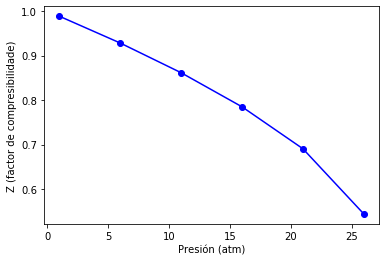

In [10]:
plt.plot (presions,zcompRK,'o-b')
#plt.legend()
plt.xlabel('Presión (atm)') 
plt.ylabel('Z (factor de compresibilidade)')
#plt.title ('n-butano')
#plt . show()

Podemos facer o mesmo para outras ecuacións de estado:

## n-butano por Redlich-Kwong-Soave
def specvolRKS(v, p):
    # in K, atm, l/gmol
    # for n-butane
    Tc = 425.2
    pc = 37.5
    T = 500
    R = 0.08206
    acentric = 0.193
    mRKS = 0.480 + (1.574 - 0.176*acentric)*acentric
    alphaRKS = (1 + mRKS *(1-(T/Tc)**0.5)) ** 2
    aRKS = 0.42748 * alphaRKS * (R * Tc) ** 2 / pc
    bRKS = 0.08664 * (R * Tc / pc)
    return p * v ** 3 - R * T * v ** 2 + (aRKS - p * bRKS ** 2 - R * T * bRKS) * v - aRKS * bRKS

# n-butano Peng-Robinson
def specvolPR(v, p):
    # in K, atm, l/gmol
    # for n-butane
    Tc = 425.2
    pc = 37.5
    T = 500
    R = 0.08206
    acentric = 0.193
    mPR = 0.37363 + (1.54226 - 0.26992*acentric)*acentric
    alphaPR = (1 + mPR *(1-(T/Tc)**0.5)) ** 2
    aPR = 0.45724 * alphaPR * (R * Tc) ** 2 / pc
    bPR = 0.07780 * (R * Tc / pc)
    return p*v**3+(bPR*p - R*T)*v**2+(aPR -2*p*bPR**2 - R*T*bPR)*v +(p*bPR**3 + R*T*bPR**2-aPR*bPR)


Preparamos os arrays para recoller os resultados e face-la representación:

In [19]:
T = 500
R = 0.08206
presions = np.arange(1, 27, 5)
print(presions)
zcompRK = np.zeros(6,dtype=float)
zcompRKS = np.zeros(6,dtype=float)
zcompPR = np.zeros(6,dtype=float)
print(zcompRK)
print(zcompRKS)
print(zcompPR)

[ 1  6 11 16 21 26]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


Cargamos os datos con lazos _for_

In [20]:
for i in range(0, 6, 1):
    p = presions[i]
    suposto = R*T/p
    v = fsolve(specvol_p_RK, suposto, p)
    z = p * v / (R * T)
    zcompRK[i] = z
    v = fsolve(specvolRKS,v,p)
    z = p * v / (R * T)
    zcompRKS[i] = z
    v = fsolve(specvolPR,v,p)
    z = p * v / (R * T)
    zcompPR[i] = z

print(zcompRK)
print(zcompRKS)
print(zcompPR)

[0.77759704 0.73019319 0.67767812 0.61743563 0.54332296 0.4280701 ]
[0.99475754 0.96825897 0.94127257 0.04429298 0.88580942 0.07518276]
[0.77468901 0.71061344 0.63551189 0.03549798 0.33776498 0.05672269]


/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Graficamos:

Text(0.5,1,'n-butano')

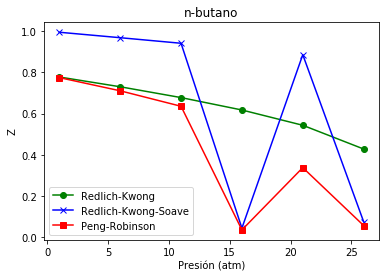

In [14]:
plt.plot(presions,zcompRK,'o-g',label='Redlich-Kwong')
plt.plot(presions,zcompRKS,'x-b',label='Redlich-Kwong-Soave')
plt.plot(presions,zcompPR,'s-r',label='Peng-Robinson')
plt.legend(loc='best')
plt.xlabel('Presión (atm)') 
plt.ylabel('Z')
plt.title ('n-butano')

In [21]:
# Esta cela da o estilo ó notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())